<a href="https://colab.research.google.com/github/kolinaf/Data-342-Lab-1/blob/main/DATA_342_Lab_1_Coca_Cola_%26_Pepsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: Using Discriptive Statistics to Evaluate Daily Returns between Coca-Cola and Pepsi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Install Required Libraries

In [2]:
!pip install openpyxl matplotlib pandas scikit-learn statsmodels

Step 3: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

Step 4: Load the Excel File

In [ ]:
import requests
import pandas as pd

file_id = '1bRR5Z6ui3Ycz46HybX42FSSPcE_L4LQFLo0eVOVg7kI'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'

response = requests.get(url)
if response.status_code == 200:
    with open('MyGoogleSheet.xlsx', 'wb') as f:
        f.write(response.content)

    df = pd.read_excel('MyGoogleSheet.xlsx', engine='openpyxl')
    display(df.head())
else:
    print(f"Error downloading file: {response.status_code}")

,Date,Company,Adj Close,Daily Return
0,2024-01-02,KO,56.78,NaN
1,2024-01-03,KO,56.91,0.0023
2,2024-01-04,KO,56.72,-0.0033
3,2024-01-05,KO,56.64,-0.0014
4,2024-01-08,KO,57.05,0.0072


Step 5: Create Data Frame

In [ ]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
0 2024-01-02      56.78           NaN
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 6: Display Sample Rows

In [ ]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
1 2024-01-03     KO      56.91        0.0023
2 2024-01-04     KO      56.72       -0.0033
3 2024-01-05     KO      56.64       -0.0014
4 2024-01-08     KO      57.05        0.0072
5 2024-01-09     KO      56.95       -0.0018


Step 7: Clean and Format the Data

In [ ]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # removes rows with missing returns

Step 8: Seperate Coco-Cola and Pepsi Data

In [ ]:
ko_df = df[df['Company'] == 'Coca-Cola']. copy()
pepsi_df = df[df['Company'] == 'Pepsi'] . copy()

In [ ]:
ko_df = df[df['Ticker'] == 'KO'].copy()
pepsi_df = df[df['Ticker'] == 'PEP'].copy()

print("\nCoca-Cola Daily Returns:")
print(ko_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nPepsi Daily Returns:")
print(pepsi_df[['Date', 'Adj Close', 'Daily Return']].head())


Coca-Cola Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03      56.91        0.0023
2 2024-01-04      56.72       -0.0033
3 2024-01-05      56.64       -0.0014
4 2024-01-08      57.05        0.0072
5 2024-01-09      56.95       -0.0018

Pepsi Daily Returns:
          Date  Adj Close  Daily Return
251 2024-01-02     162.68        1.6809
252 2024-01-03     162.72        0.0002
253 2024-01-04     161.33       -0.0085
254 2024-01-05     158.95       -0.0148
255 2024-01-08     159.11        0.0010


Step 9: Visualize Daily Returns with Box and Whisker Plots

/tmp/ipython-input-4230467824.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


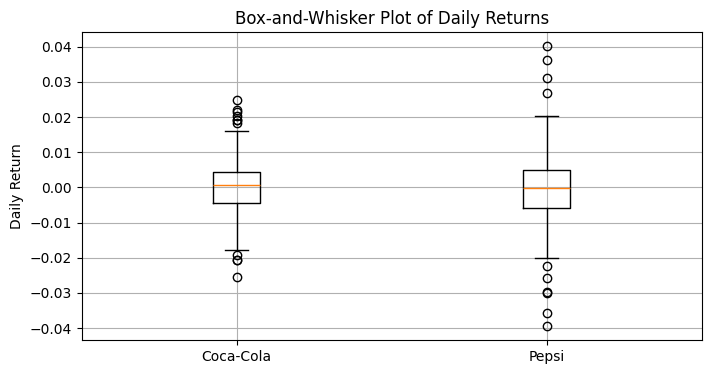

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot(
    [ko_clean['Daily Return'], pepsi_clean['Daily Return']],
    labels=['Coca-Cola', 'Pepsi'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

xls = pd.ExcelFile('DATA 342 Lab 1.xlsx', engine='openpyxl')
print(xls.sheet_names)


['Sheet1']


In [ ]:
import pandas as pd

df = pd.read_excel('DATA 342 Lab 1.xlsx', sheet_name='Sheet1', engine='openpyxl')
print(df.head())


        Date Ticker  Adj Close  Daily Return
0 2024-01-02     KO      56.78           NaN
1 2024-01-03     KO      56.91        0.0023
2 2024-01-04     KO      56.72       -0.0033
3 2024-01-05     KO      56.64       -0.0014
4 2024-01-08     KO      57.05        0.0072


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])

# Split into Coca-Cola and Pepsi data
ko_df = df[df['Ticker'] == 'KO'].copy()
pep_df = df[df['Ticker'] == 'PEP'].copy()


Step 10: Descriptive Statistics

In [ ]:
from scipy import stats

# Define a function to calculate descriptive statistics
def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics for Coca-Cola (KO) and Pepsi (PEP)
ko_stats = descriptive_stats(ko_df['Daily Return'])
pep_stats = descriptive_stats(pep_df['Daily Return'])

# Display results clearly
print("Descriptive Statistics for Coca-Cola (KO):")
for key, value in ko_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for Pepsi (PEP):")
for key, value in pep_stats.items():
    print(f"{key}: {value}")


Descriptive Statistics for Coca-Cola (KO):
Mean: 0.0002991999999999999
Median: 0.0006000000000000001
Mode: 0.0
Standard Deviation: 0.00804284706529116
Sample Variance: 6.468738891566263e-05
Kurtosis: 0.7097325177519012
Skewness: 0.050096746475664596
Range: 0.0505
Minimum: -0.0255
Maximum: 0.025

Descriptive Statistics for Pepsi (PEP):
Mean: 0.0063513944223107565
Median: -0.0003
Mode: -0.0031
Standard Deviation: 0.10661374558680421
Sample Variance: 0.011366490748047815
Kurtosis: 246.32130594838978
Skewness: 15.621867163628378
Range: 1.7204000000000002
Minimum: -0.0395
Maximum: 1.6809


Step 11: Hypothesis Testing

In [ ]:
# Hypothesis Testing: Independent t-test (Coca-Cola vs. Pepsi)
t_stat, p_value = stats.ttest_ind(ko_df['Daily Return'], pep_df['Daily Return'], equal_var=False)

print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("\nResult: There is a statistically significant difference between Coca-Cola and Pepsi's mean daily returns.")
else:
    print("\nResult: There is no statistically significant difference between Coca-Cola and Pepsi's mean daily returns.")



Hypothesis Testing (Independent t-test):
T-statistic: -0.8968076830326455
P-value: 0.3706745776717566

Result: There is no statistically significant difference between Coca-Cola and Pepsi's mean daily returns.


Step 12: Bar Graph with Error Bars

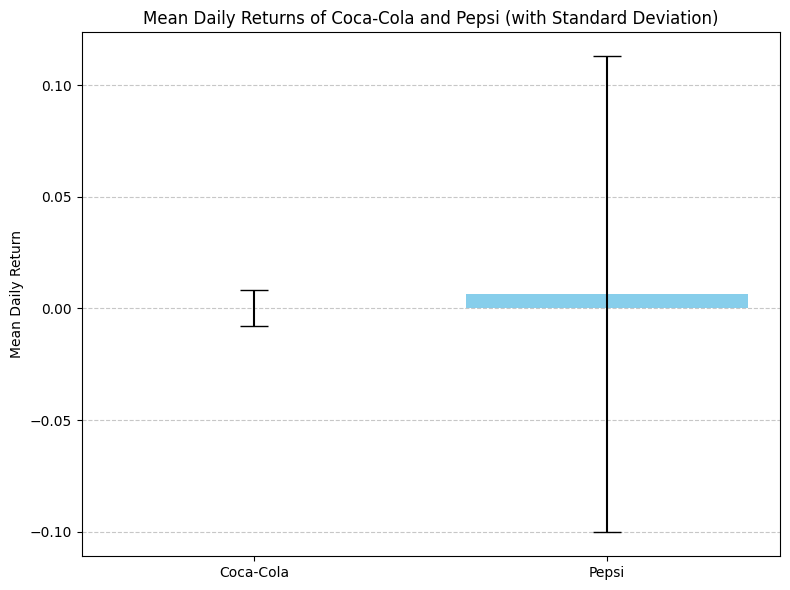


Interpretation:
The p-value > 0.05, so we fail to reject the null hypothesis.
This means there is no statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.


In [ ]:
# Install required libraries (if not already installed)
!pip install pandas matplotlib openpyxl scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load your Excel file (adjust file name if needed)
file_path = 'DATA 342 Lab 1.xlsx'  # or '342 Fall 2025 Lab 1 (1).xlsx' if that's the uploaded file name
df = pd.read_excel(file_path, sheet_name='Sheet1', engine='openpyxl')

# Clean and filter the data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Daily Return'])

# Separate Coca-Cola and Pepsi data
ko_df = df[df['Ticker'] == 'KO'].copy()
pep_df = df[df['Ticker'] == 'PEP'].copy()

# Compute mean and standard deviation for error bars
mean_ko = ko_df['Daily Return'].mean()
std_ko = ko_df['Daily Return'].std()
mean_pep = pep_df['Daily Return'].mean()
std_pep = pep_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(ko_df['Daily Return'], pep_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_ko, mean_pep]
errors = [std_ko, std_pep]
labels = ['Coca-Cola', 'Pepsi']
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns of Coca-Cola and Pepsi (with Standard Deviation)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --------------------------
# INTERPRETATION SECTION
# --------------------------
print("\nInterpretation:")
if p_value > 0.05:
    print("The p-value > 0.05, so we fail to reject the null hypothesis.")
    print("This means there is no statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.")
else:
    print("The p-value < 0.05, so we reject the null hypothesis.")
    print("This means there is a statistically significant difference in the average daily returns between Coca-Cola and Pepsi based on this dataset.")


Load CSV File With Revised Data  

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Coca-Cola and  Pepsi Revised - Sheet1.csv to Coca-Cola and  Pepsi Revised - Sheet1.csv


Load upload file into df

In [11]:
import pandas as pd
import numpy as np


filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df['Date'] = pd.to_datetime(df['Date'])

df.head()

/tmp/ipython-input-2688579493.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Day Index,Ticker,Adj Close,Daily Return,Predicted Price,Unnamed: 6,Unnamed: 7,SUMMARY OUTPUT,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2024-01-02,1,KO,56.78,NaN,56.44,NaN,NaN,Coco-Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-03,2,KO,56.91,0.23%,56.48,NaN,NaN,Regression Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-04,3,KO,56.72,-0.33%,56.52,NaN,NaN,Multiple R,0.70564394,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-05,4,KO,56.64,-0.14%,56.57,NaN,NaN,R Square,0.49793337,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-08,5,KO,57.05,0.72%,56.61,NaN,NaN,Adjusted R Square,0.49591704,NaN,NaN,NaN,NaN,NaN,NaN


Step 13: Filter Q1 Data

In [12]:
q1_2024_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-03-31')].copy()
q1_2024_df = q1_2024_df.sort_values('Date')

q1_2024_df['DayIndex'] = np.arange(len(q1_2024_df))

ko_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'KO'].copy()
pep_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'PEP'].copy()


Step 14: Develop a Regression Model for Q1 2024 Data


===== Coca-Cola (KO) Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:         Q("Adj Close")   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     22.45
Date:                Sun, 16 Nov 2025   Prob (F-statistic):           1.40e-05
Time:                        06:35:06   Log-Likelihood:                -47.186
No. Observations:                  61   AIC:                             98.37
Df Residuals:                      59   BIC:                             102.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inter

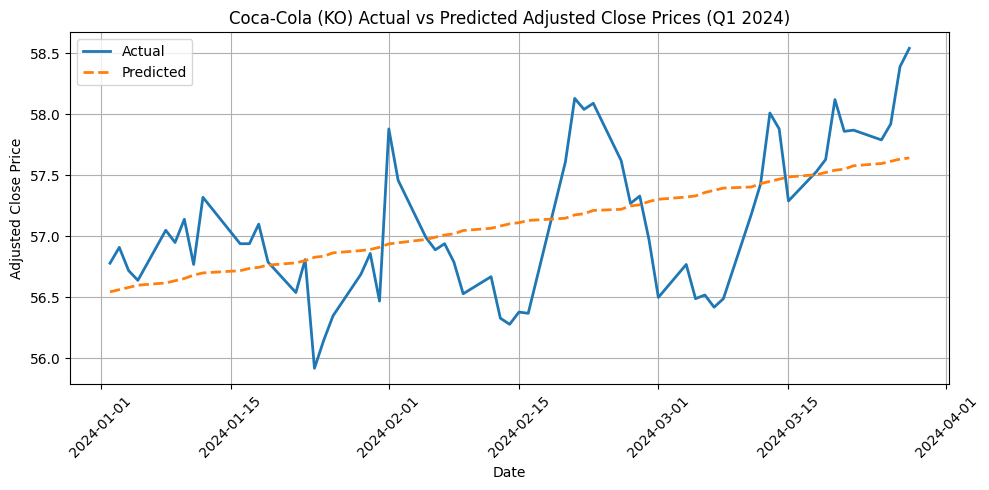

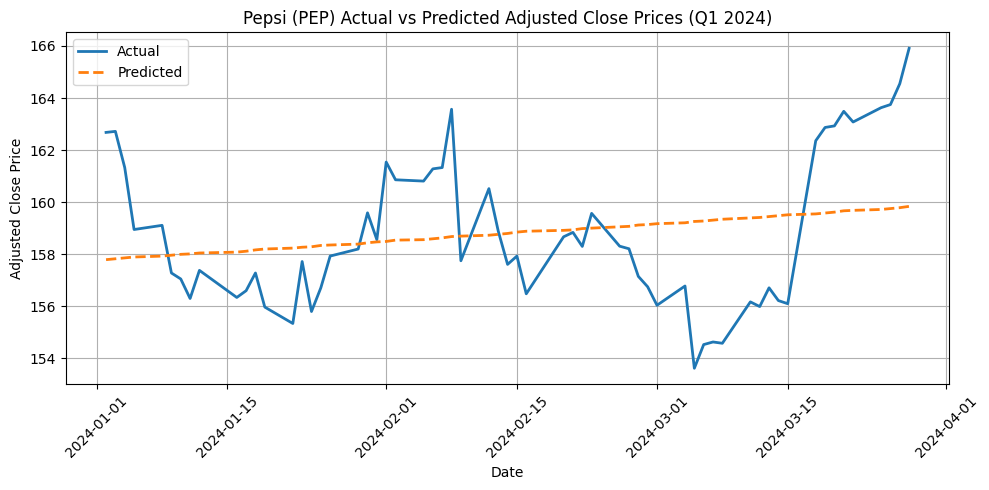

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.api as sm

# ---------- Regression function with additional metrics ----------
def perform_regression(data, company_name):
    # Statsmodels OLS with formula API
    # Q("Adj Close") is used because of the space in the column name
    model_sm = smf.ols(formula='Q("Adj Close") ~ DayIndex', data=data).fit()

    print(f"\n===== {company_name} Regression Summary =====")
    print(model_sm.summary())   # R², Adj R², F, p-values, etc.

    # ANOVA table
    anova_table = sm.stats.anova_lm(model_sm, typ=2)
    print("\nANOVA Table:")
    print(anova_table)

    # Metrics
    r_square = model_sm.rsquared
    adjusted_r_square = model_sm.rsquared_adj
    multiple_r = np.sqrt(r_square)   # sqrt(R²) for simple linear regression
    standard_error = np.sqrt(model_sm.mse_resid)  # residual std. error

    # Use sklearn for predictions + RMSE
    X = data[['DayIndex']]
    y = data['Adj Close']
    model_sk = LinearRegression()
    model_sk.fit(X, y)
    y_pred = model_sk.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Add predictions to dataframe
    data = data.copy()               # avoid SettingWithCopy warning
    data['Predicted'] = y_pred

    metrics = {
        'Multiple R': multiple_r,
        'R Square': r_square,
        'Adjusted R Square': adjusted_r_square,
        'Standard Error': standard_error,
        'RMSE': rmse
    }

    return model_sk, data, metrics

# ---------- Run regression for Coca-Cola and Pepsi ----------
ko_model, ko_2024_with_predictions, ko_metrics = perform_regression(ko_2024, 'Coca-Cola (KO)')
pep_model, pep_2024_with_predictions, pep_metrics = perform_regression(pep_2024, 'Pepsi (PEP)')

# ---------- Print metrics ----------
print("\nCoca-Cola (KO) Regression Metrics:")
for key, value in ko_metrics.items():
    print(f"{key}: {value:.9f}")

print("\nPepsi (PEP) Regression Metrics:")
for key, value in pep_metrics.items():
    print(f"{key}: {value:.9f}")

# ---------- Plot KO actual vs predicted ----------
plt.figure(figsize=(10, 5))
plt.plot(ko_2024_with_predictions['Date'], ko_2024_with_predictions['Adj Close'],
         label='Actual', linewidth=2)
plt.plot(ko_2024_with_predictions['Date'], ko_2024_with_predictions['Predicted'],
         label='Predicted', linestyle='--', linewidth=2)
plt.title('Coca-Cola (KO) Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Plot PEP actual vs predicted ----------
plt.figure(figsize=(10, 5))
plt.plot(pep_2024_with_predictions['Date'], pep_2024_with_predictions['Adj Close'],
         label='Actual', linewidth=2)
plt.plot(pep_2024_with_predictions['Date'], pep_2024_with_predictions['Predicted'],
         label='Predicted', linestyle='--', linewidth=2)
plt.title('Pepsi (PEP) Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
